[1.00000000e-03 1.61026203e-03 2.59294380e-03 4.17531894e-03
 6.72335754e-03 1.08263673e-02 1.74332882e-02 2.80721620e-02
 4.52035366e-02 7.27895384e-02 1.17210230e-01 1.88739182e-01
 3.03919538e-01 4.89390092e-01 7.88046282e-01 1.26896100e+00
 2.04335972e+00 3.29034456e+00 5.29831691e+00 8.53167852e+00
 1.37382380e+01 2.21221629e+01 3.56224789e+01 5.73615251e+01
 9.23670857e+01 1.48735211e+02 2.39502662e+02 3.85662042e+02
 6.21016942e+02 1.00000000e+03]
[ 91.2  91.5  92.1  91.3  91.4  92.9  93.3  84.8  76.1  73.5  56.8  54.2
  42.8  50.7  49.1  47.8  33.2  86.4 124.6 186.4 198.  183.6 197.6 187.6
 199.2 186.4   8.    8.    8.    8. ]
8.0


C:\Users\Aaron\AppData\Local\Temp\ipykernel_30164\2524084402.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


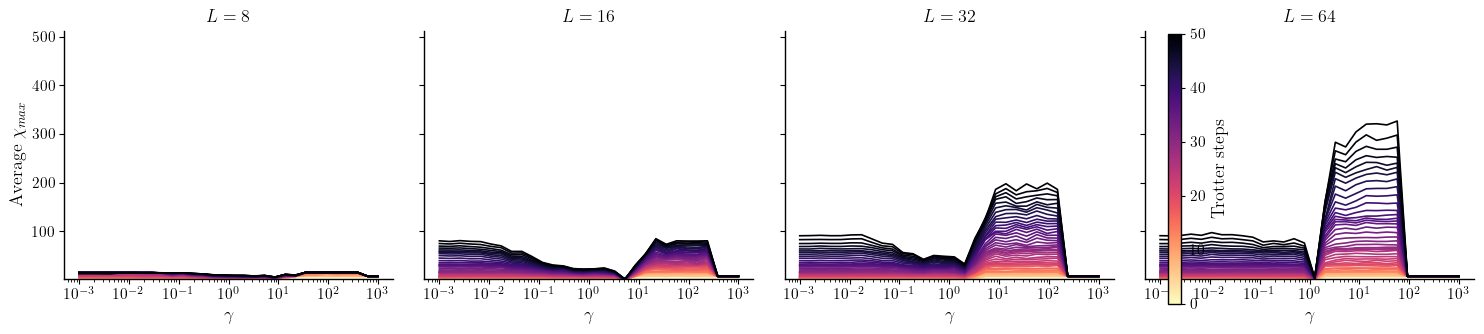

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pickle

# ----- Global plot style -----
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 13,
    "font.size": 12,
    "axes.titlesize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "axes.linewidth": 1.0,
    "legend.fontsize": 11,
    "figure.figsize": (15, 3.5)  # 5 plots side-by-side
})

system_sizes = [8, 16, 32, 64]
gammas = np.logspace(-3, 3, 30)

fig, axes = plt.subplots(1, len(system_sizes), sharey=True)

for idx, L in enumerate(system_sizes):
    ax = axes[idx]
    filename = f"ising_depolarizing/results_{L}.pickle"
    
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    results = np.array(results).T
    num_curves = len(results)

    # Set colormap
    cmap = plt.get_cmap('magma_r')
    norm = mcolors.Normalize(vmin=0, vmax=num_curves - 1)
    colors = cmap(np.linspace(0, 1, num_curves))

    # Plot each curve
    for j in range(num_curves):
        x = np.array(gammas)
        y = results[j]
        ax.plot(x, y, color=colors[j], lw=1.2)
        if L == 32:
            if j == num_curves-1:
                print(x)
                print(y)
                print(min(y))

    ax.set_xscale('log')
    ax.set_ylim(2, 512)
    ax.set_title(f'$L = {L}$')
    if idx == 0:
        ax.set_ylabel('Average $\\chi_{max}$')
    ax.set_xlabel('$\\gamma$')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Add a shared colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), pad=0.02)
cbar.set_label('Trotter steps', labelpad=5)
cbar.ax.tick_params(direction='out', length=3)

plt.tight_layout()
plt.show()